## POKEMON Dataset


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as pyplot
%matplotlib inline

In [26]:
df = pd.read_csv("Pokemon_dot.csv", index_col=0)

In [27]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


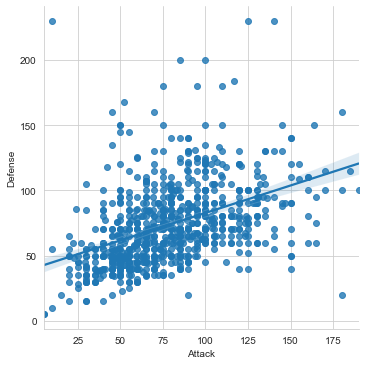

In [29]:

# Recommended way
sns.lmplot(x='Attack', y='Defense', data=df)


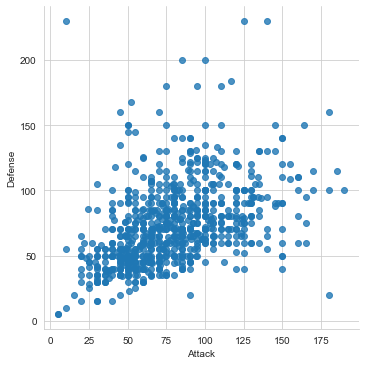

In [30]:
sns.lmplot(x='Attack',y='Defense', data=df,
 fit_reg=False,)


In [31]:
#plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
            fit_reg=False, 
            hue='Stage')
#Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)



KeyError: "['Stage'] not in index"

<AxesSubplot:>

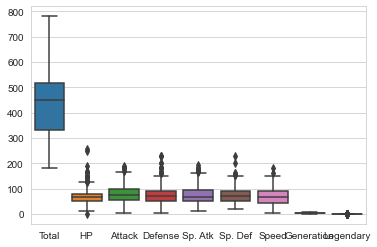

In [33]:
sns.boxplot(data=df)

<AxesSubplot:>

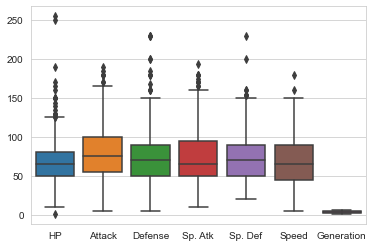

In [34]:
#Pre-format DataFrame
stats_df = df.drop(['Total','Legendary'], axis=1)
#New boxplot using stats_df
sns.boxplot(data=stats_df)

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

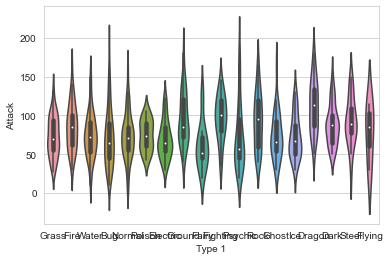

In [35]:
#Set theme
sns.set_style('whitegrid')

#Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

In [36]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

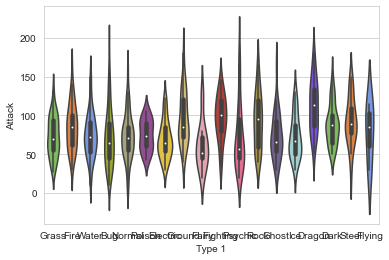

In [38]:
#Violine plot with pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df,
palette=pkmn_type_colors) #Set color palette


<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

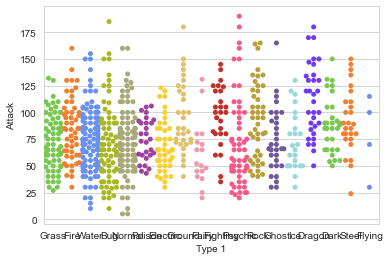

In [40]:
sns.swarmplot(x='Type 1',y='Attack',data=df,
palette=pkmn_type_colors)

Text(0.5, 1.0, 'Attack by Type')

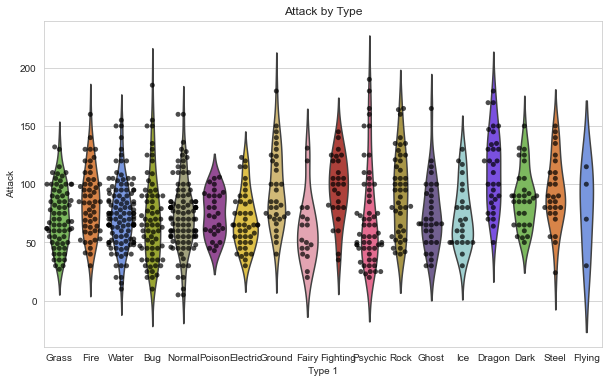

In [41]:
plt.figure(figsize=(10,6))

#Create Plot
sns.violinplot(x='Type 1', y='Attack',data=df,inner=None,
        palette=pkmn_type_colors)

sns.swarmplot(x='Type 1',y='Attack',
data=df,
color='k',alpha=0.7)

#set title with matplotlib
plt.title('Attack by Type')

In [42]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
#,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1
4,Charmander,Fire,NaN,39,52,43,60,50,65,1


In [43]:
melted_df = pd.melt(stats_df,
                    id_vars=["Name", "Type 1", "Type 2"],
                    var_name="Stat")
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,VenusaurMega Venusaur,Grass,Poison,HP,80
4,Charmander,Fire,NaN,HP,39


In [44]:
print(stats_df.shape)
print(melted_df.shape)


(800, 10)
(5600, 5)


<AxesSubplot:xlabel='Stat', ylabel='value'>

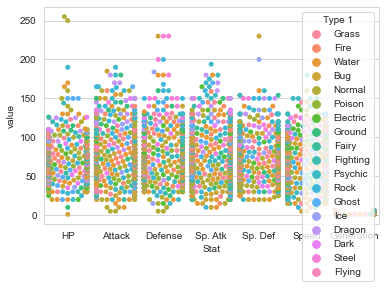

In [51]:
sns.swarmplot(x='Stat', y='value', data=melted_df,
            hue='Type 1')

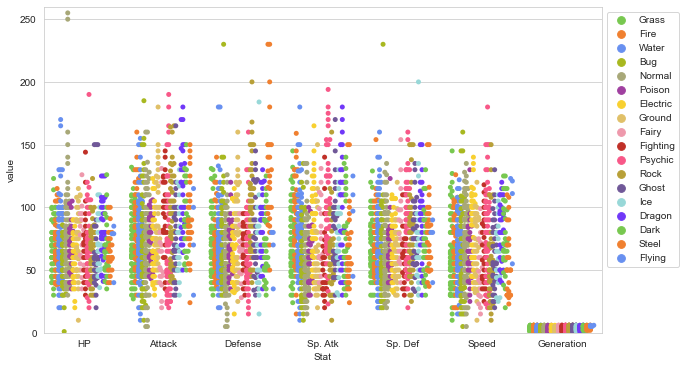

In [53]:
#Enlarge the plot. 
plt.figure(figsize=(10,6))

sns.swarmplot(x='Stat',
            y='value',
            data=melted_df,
            hue= 'Type 1',
            split=True,
            palette=pkmn_type_colors)


#4. Adjust the y-axis
plt.ylim(0,260)

#5 place the lengend to the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

<AxesSubplot:>

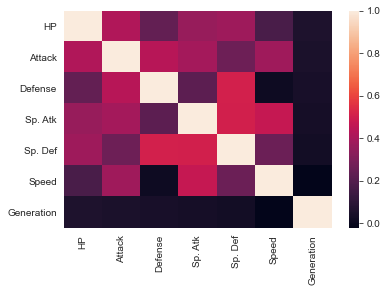

In [54]:
#calculate the correlations
corr = stats_df.corr()

sns.heatmap(corr)